In [1]:
%matplotlib inline
import torch as tc
import tensorflow as tf
import mxnet as mx
from mxnet import np as mxnp
from mxnet import npx as npx
npx.set_np()
# import numpy as np

from d2l import mxnet as mxd2l  # Use MXNet as the backend
from d2l import torch as tcd2l  # Use PyTorch as the backend
from d2l import tensorflow as tfd2l  # Use TensorFlow as the backend

tc.__version__,tf.__version__,mx.__version__

('1.6.0', '2.3.1', '1.7.0')

## demo of seq data loader

In [2]:
T=20
time=mxnp.arange(1,T+1,dtype=mxnp.float32)
time

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])

In [3]:
x=mxnp.sin(0.01*time)+mxnp.random.normal(0,0.2,(T,))

In [4]:
x

array([ 0.24261554,  0.4624399 ,  0.12675641,  0.1947901 ,  0.10989186,
        0.26865208,  0.10054794,  0.3166998 , -0.14388442,  0.4781757 ,
        0.42139256, -0.12723608,  0.02044523, -0.2146627 , -0.32168782,
        0.06904132,  0.27747038,  0.2949063 ,  0.72456026, -0.17254707])

In [13]:
tau=4
features=mxnp.zeros((T-tau,tau))
features_demo=mxnp.zeros((T-tau,tau))

In [14]:
features.shape

(16, 4)

In [15]:
for i in range(tau):
    features_demo[:,i]=time[i:T-tau+i]
    features[:,i]=x[i:T-tau+i]

In [16]:
features_demo,features

(array([[ 1.,  2.,  3.,  4.],
        [ 2.,  3.,  4.,  5.],
        [ 3.,  4.,  5.,  6.],
        [ 4.,  5.,  6.,  7.],
        [ 5.,  6.,  7.,  8.],
        [ 6.,  7.,  8.,  9.],
        [ 7.,  8.,  9., 10.],
        [ 8.,  9., 10., 11.],
        [ 9., 10., 11., 12.],
        [10., 11., 12., 13.],
        [11., 12., 13., 14.],
        [12., 13., 14., 15.],
        [13., 14., 15., 16.],
        [14., 15., 16., 17.],
        [15., 16., 17., 18.],
        [16., 17., 18., 19.]]),
 array([[ 0.24261554,  0.4624399 ,  0.12675641,  0.1947901 ],
        [ 0.4624399 ,  0.12675641,  0.1947901 ,  0.10989186],
        [ 0.12675641,  0.1947901 ,  0.10989186,  0.26865208],
        [ 0.1947901 ,  0.10989186,  0.26865208,  0.10054794],
        [ 0.10989186,  0.26865208,  0.10054794,  0.3166998 ],
        [ 0.26865208,  0.10054794,  0.3166998 , -0.14388442],
        [ 0.10054794,  0.3166998 , -0.14388442,  0.4781757 ],
        [ 0.3166998 , -0.14388442,  0.4781757 ,  0.42139256],
        [-0.14388442, 

In [17]:
labels_demo=mxd2l.reshape(time[tau:],(-1,1));labels=mxd2l.reshape(x[tau:],(-1,1))

In [19]:
labels_demo,labels

(array([[ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.]]),
 array([[ 0.10989186],
        [ 0.26865208],
        [ 0.10054794],
        [ 0.3166998 ],
        [-0.14388442],
        [ 0.4781757 ],
        [ 0.42139256],
        [-0.12723608],
        [ 0.02044523],
        [-0.2146627 ],
        [-0.32168782],
        [ 0.06904132],
        [ 0.27747038],
        [ 0.2949063 ],
        [ 0.72456026],
        [-0.17254707]]))

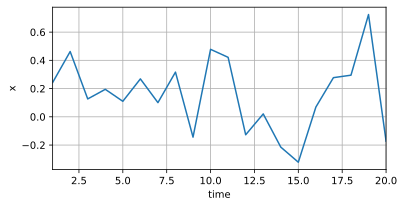

In [21]:
mxd2l.plot(time, [x], 'time', 'x', xlim=[1, 20], figsize=(6, 3))

In [22]:
labels.shape

(16, 1)

In [26]:
bs=4
dl=mxd2l.load_array((features,labels),bs,is_train=True)
dl_demo=mxd2l.load_array((features_demo,labels_demo),bs,is_train=True)

In [28]:
for x,y in dl_demo:
    print(list(zip(x,y)))

[(array([15., 16., 17., 18.]), array([19.])), (array([13., 14., 15., 16.]), array([17.])), (array([16., 17., 18., 19.]), array([20.])), (array([5., 6., 7., 8.]), array([9.]))]
[(array([11., 12., 13., 14.]), array([15.])), (array([1., 2., 3., 4.]), array([5.])), (array([2., 3., 4., 5.]), array([6.])), (array([ 7.,  8.,  9., 10.]), array([11.]))]
[(array([14., 15., 16., 17.]), array([18.])), (array([10., 11., 12., 13.]), array([14.])), (array([ 8.,  9., 10., 11.]), array([12.])), (array([6., 7., 8., 9.]), array([10.]))]
[(array([12., 13., 14., 15.]), array([16.])), (array([4., 5., 6., 7.]), array([8.])), (array([ 9., 10., 11., 12.]), array([13.])), (array([3., 4., 5., 6.]), array([7.]))]


## formal code

### ---mxnet

In [32]:
from mxnet import init,autograd,gluon
T=1000
time=mxnp.arange(1,T+1,dtype=mxnp.float32)
x1=mxnp.sin(0.01*time)
eta=mxnp.random.normal(0,0.2,(T,))
x=x1+eta

In [34]:
x1.shape,eta.shape

((1000,), (1000,))

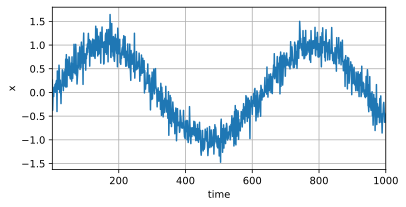

In [35]:
mxd2l.plot(time, [x], 'time', 'x', xlim=[1, 1000], figsize=(6, 3))

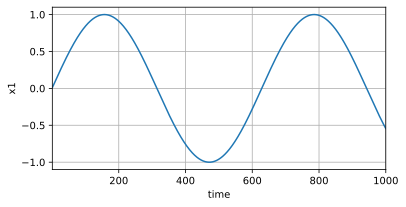

In [36]:
mxd2l.plot(time, [x1], 'time', 'x1', xlim=[1, 1000], figsize=(6, 3))

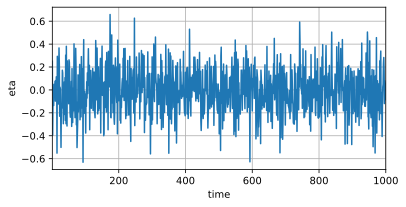

In [37]:
mxd2l.plot(time, [eta], 'time', 'eta', xlim=[1, 1000], figsize=(6, 3))

In [40]:
eta.max(),eta.min(),eta.mean(),eta.std()

(array(0.65809065), array(-0.63115484), array(-0.00193451), array(0.19899718))

In [41]:
eta2=mxnp.random.uniform(0,0.2,(T,))

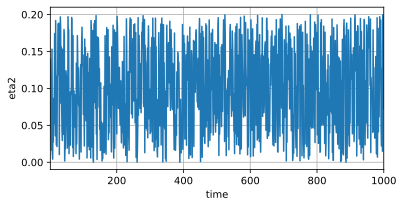

In [42]:
mxd2l.plot(time, [eta2], 'time', 'eta2', xlim=[1, 1000], figsize=(6, 3))

In [43]:
eta2.max(),eta2.min(),eta2.mean(),eta2.std()

(array(0.1999617), array(0.00010919), array(0.09900314), array(0.05871142))

In [182]:
tau = 4
features = mxnp.zeros((T - tau, tau))
for i in range(tau):
    features[:, i] = x[i: T - tau + i]
labels = mxd2l.reshape(x[tau:], (-1, 1))

batch_size, n_train = 16, 600
# Only the first `n_train` examples are used for training
train_iter = mxd2l.load_array((features[:n_train], labels[:n_train]),
                            batch_size, is_train=True)

In [183]:
features.shape,labels.shape

((996, 4), (996, 1))

In [184]:
600/16

37.5

In [185]:
len(train_iter)

38

In [186]:
def get_net():
    net=gluon.nn.Sequential()
    net.add(gluon.nn.Dense(10,activation='relu'),
           gluon.nn.Dense(1))
    net.initialize(init=init.Xavier())
    return net

In [187]:
net=get_net()
net

Sequential(
  (0): Dense(-1 -> 10, Activation(relu))
  (1): Dense(-1 -> 1, linear)
)

In [188]:
loss=gluon.loss.L2Loss()

In [189]:
def train(net,train_iter,loss,epochs,lr):
    trainer=gluon.Trainer(net.collect_params(),'adam',{'learning_rate':lr})
    for epoch in range(epochs):
        for x,y in train_iter:
            with autograd.record():
                l=loss(net(x),y)
            l.backward()
            trainer.step(batch_size)
        print(f"epoch {epoch+1},mean loss{mxd2l.evaluate_loss(net,train_iter,loss):3f}")

In [190]:
# mxd2l.evaluate_loss??

In [191]:
train(net,train_iter,loss,5,0.01)

epoch 1,mean loss0.074369
epoch 2,mean loss0.033093
epoch 3,mean loss0.027676
epoch 4,mean loss0.027631
epoch 5,mean loss0.026138


### **onestep_preds 

In [192]:
onestep_preds=net(features)

In [193]:
onestep_preds.shape

(996, 1)

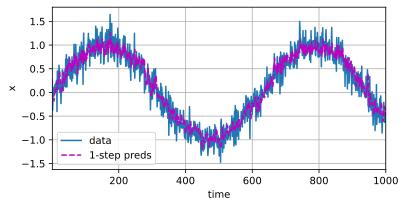

In [194]:
mxd2l.plot([time, time[tau:]], [mxd2l.numpy(x), mxd2l.numpy(onestep_preds)], 'time',
         'x', legend=['data', '1-step preds'], xlim=[1, 1000],
         figsize=(6, 3))

### **multistep_preds 

In [195]:
multistep_preds = mxnp.zeros(T)

In [196]:
multistep_preds.shape

(1000,)

In [197]:
multistep_preds[: n_train + tau]=x[: n_train + tau]

In [198]:
n_train + tau

604

In [199]:
for i in range(n_train + tau,T):
    xs=multistep_preds[i-tau:i] 
    if i==604:print(xs.shape)
    xs=xs.reshape(1,-1)
    if i==604:print(xs.shape)
    yi=net(xs)
    if i==604:print(xs.shape,yi.shape)
    yi=mxd2l.reshape(yi,1)
    if i==604:print(xs.shape,yi.shape)
    multistep_preds[i]=yi
#     print(i,xs[0],yi)

(4,)
(1, 4)
(1, 4) (1, 1)
(1, 4) (1,)


In [200]:
multistep_preds[-1]

array(-0.28489435)

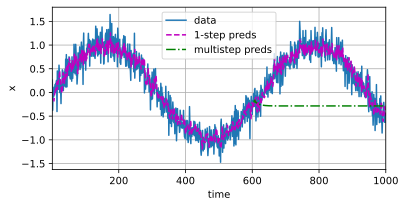

In [201]:
mxd2l.plot([time, time[tau:], time[n_train + tau:]],
         [mxd2l.numpy(x), mxd2l.numpy(onestep_preds),
          mxd2l.numpy(multistep_preds[n_train + tau:])], 'time',
         'x', legend=['data', '1-step preds', 'multistep preds'],
         xlim=[1, 1000], figsize=(6, 3))

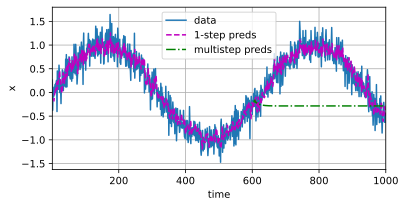

In [202]:
d2l=mxd2l
multistep_preds = mxnp.zeros(T)
multistep_preds[: n_train + tau] = x[: n_train + tau]
for i in range(n_train + tau, T):
    multistep_preds[i] = d2l.reshape(net(
        multistep_preds[i - tau: i].reshape(1, -1)), 1)


mxd2l.plot([time, time[tau:], time[n_train + tau:]],
         [d2l.numpy(x), d2l.numpy(onestep_preds),
          d2l.numpy(multistep_preds[n_train + tau:])], 'time',
         'x', legend=['data', '1-step preds', 'multistep preds'],
         xlim=[1, 1000], figsize=(6, 3))

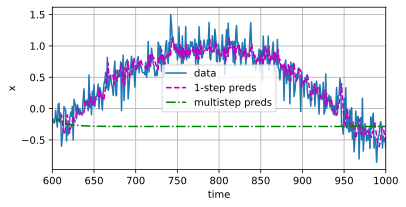

In [203]:
mxd2l.plot([time[600:], time[600+tau:], time[n_train + tau:]],
         [mxd2l.numpy(x)[600:], mxd2l.numpy(onestep_preds)[600:],
          mxd2l.numpy(multistep_preds[n_train + tau:])], 'time',
         'x', legend=['data', '1-step preds', 'multistep preds'],
         xlim=[600, 1000], figsize=(6, 3))

In [204]:
mxd2l.reshape??

Signature: mxd2l.reshape(x, *args, **kwargs)
Docstring: <no docstring>
Source:    reshape = lambda x, *args, **kwargs: x.reshape(*args, **kwargs)
File:      c:\users\hp\miniconda3\envs\d2l\lib\site-packages\d2l\mxnet.py
Type:      function


In [205]:
max_steps = 64
features = mxnp.zeros((T - tau - max_steps + 1, tau + max_steps))

In [206]:
tau + max_steps

68

In [207]:
features.shape,features.shape[0]+features.shape[1]

((933, 68), 1001)

In [208]:
for i in range(tau):
    features[:, i] = x[i: i + T - tau - max_steps + 1].T

In [209]:
features.shape

(933, 68)

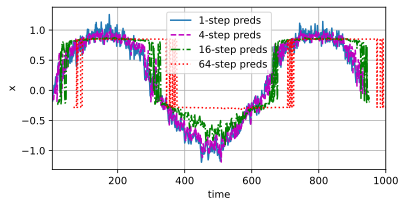

In [210]:
for i in range(tau, tau + max_steps):
    features[:, i] = d2l.reshape(net(features[:, i - tau: i]), -1)

steps = (1, 4, 16, 64)
d2l.plot([time[tau + i - 1: T - max_steps + i] for i in steps],
         [d2l.numpy(features[:, tau + i - 1]) for i in steps], 'time', 'x',
         legend=[f'{i}-step preds' for i in steps], xlim=[5, 1000],
         figsize=(6, 3))

### ---torch

### ---tensorflow